#### Objective: 
A company called Ferizon (not Verizon) wants to understand why customers "CHURN" or leave the company. The goal of this project is explain the churn and to determine an effective strategy as to how to address it.

#### Step #1: 
Import all of the releant libaries.

In [57]:
# import libraries for functions: numpy for stats, seaborn for visuralization
# sklearn for linear regression
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from pandasql import sqldf
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.metrics import confusion_matrix, roc_curve, auc 
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
#import graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from io import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#loading data
url = 'https://bit.ly/ferizon'
df_churn = pd.read_csv(url)

#### Step #2: Understand the data

Before getting into data analysis process, we need to first understand what kind of data we have as well as the quality of the data. Using shape function to find out how many data points we have and how many columns. 

In [3]:
# calculate the dimention of data (rows and columns) 731 records in 14 fields
df_churn.shape

(7032, 17)

The dtype function allows us to see the type of each input, for example, 'date' is an object, which can not be used for calculation, while 'temp' is float, and it could be used to build linear regression models.

In [4]:
#List the columns in the dataset along with their data types.
df_churn.dtypes

customer_id           object
churn                 object
gender                object
senior_citizen        object
married               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
security              object
backup                object
paperless_billing     object
contract              object
payment               object
monthly_charges      float64
total_charges        float64
dtype: object

Now we are trying to look into the data. Seeing each column and coresponding rows gives an idea on how to approach the data for analysis. head function allows us to see the first 5 data points.

In [5]:
# showcase the first 5 records of data
df_churn.head(5)

,customer_id,churn,gender,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,internet_service,security,backup,paperless_billing,contract,payment,monthly_charges,total_charges
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,Yes,Annually,Check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,Monthly,Check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber,No,No,Yes,Monthly,eCheck,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber,No,Yes,Yes,Monthly,eCheck,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber,No,No,Yes,Monthly,Check,83.9,267.40


#### Step #3: data preparation:
After we looked into the data, we realize that having two columns of casual_rentals and regristered_renterals is a little bit more difficult for analysis, so instead, we add the values of the two columns together into one called 'total_rentals'.

In [6]:
#Change the yes/no into 0/1 binary variables
df_churn[['churn', 'senior_citizen', 'married', 'dependents','multiple_lines','phone_service', 'security', 'backup', 'paperless_billing']] = df_churn[['churn', 'senior_citizen', 'married', 'dependents','multiple_lines','phone_service', 'security', 'backup', 'paperless_billing']].replace(['No', 'Yes'],
                                                [0,1])
df_churn.head()

,customer_id,churn,gender,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,internet_service,security,backup,paperless_billing,contract,payment,monthly_charges,total_charges
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,1,Annually,Check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,Monthly,Check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber,0,0,1,Monthly,eCheck,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber,0,1,1,Monthly,eCheck,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber,0,0,1,Monthly,Check,83.9,267.40


In [7]:
#Change the Female/Male into 0/1 binary variables
df_churn['gender'] = df_churn['gender'].replace(['Female', 'Male'],
                                           [0,1])
df_churn['sex_male'] = df_churn['gender']
df_churn = df_churn.drop(['gender'], axis = 1)
df_churn.head()

,customer_id,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,internet_service,security,backup,paperless_billing,contract,payment,monthly_charges,total_charges,sex_male
0,0002-ORFBO,0,0,1,1,9,1,0,DSL,0,1,1,Annually,Check,65.6,593.30,0
1,0003-MKNFE,0,0,0,0,9,1,1,DSL,0,0,0,Monthly,Check,59.9,542.40,1
2,0004-TLHLJ,1,0,0,0,4,1,0,Fiber,0,0,1,Monthly,eCheck,73.9,280.85,1
3,0011-IGKFF,1,1,1,0,13,1,0,Fiber,0,1,1,Monthly,eCheck,98.0,1237.85,1
4,0013-EXCHZ,1,1,1,0,3,1,0,Fiber,0,0,1,Monthly,Check,83.9,267.40,0


In [8]:
#Identify and clean up the data underneath the internet service column. 
#One mechanism of accomplishing this, is to run queries on pandasql for a more in-depth descriptive analysis.
sub_data = sqldf("SELECT internet_service, count(*) FROM df_churn GROUP BY internet_service;", globals())
sub_data
#It appears that there are 3 values underneath the internet service column. They are "DSL", "Fiber", and "No". 
#Next, it is important to convert this column into dummy variables with 0,1 binaries.

,internet_service,count(*)
0,DSL,2416
1,Fiber,3096
2,No,1520


In [9]:
#Now let's create dummy varialbes around this column.
internet_service_dummies=pd.get_dummies(df_churn['internet_service'], prefix = 'DSL').iloc[:,1:]
internet_service_dummies.head()
df_churn = pd.concat([df_churn, internet_service_dummies], axis = 1)
df_churn = df_churn.drop(['internet_service'], axis = 1)
df_churn.head()

,customer_id,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,paperless_billing,contract,payment,monthly_charges,total_charges,sex_male,DSL_Fiber,DSL_No
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,1,Annually,Check,65.6,593.30,0,0,0
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,0,Monthly,Check,59.9,542.40,1,0,0
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,Monthly,eCheck,73.9,280.85,1,1,0
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,1,Monthly,eCheck,98.0,1237.85,1,1,0
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,1,Monthly,Check,83.9,267.40,0,1,0


In [10]:
#Another mechanism for determining the values underneath a column would be to utilize the values_counts function in pandas.
#Let's try this method with the contract column.
df_churn.contract.value_counts()

Monthly       3875
Biannually    1685
Annually      1472
Name: contract, dtype: int64

In [11]:
#We clearly need dummy variables for this column as well. Let's create some dummy variables for the contract column.
contract_dummies=pd.get_dummies(df_churn['contract'], prefix = 'Monthly').iloc[:,1:]
contract_dummies.head()
df_churn = pd.concat([df_churn, contract_dummies], axis = 1)
df_churn = df_churn.drop(['contract'], axis = 1)
df_churn.head()

,customer_id,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,paperless_billing,payment,monthly_charges,total_charges,sex_male,DSL_Fiber,DSL_No,Monthly_Biannually,Monthly_Monthly
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,1,Check,65.6,593.30,0,0,0,0,0
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,0,Check,59.9,542.40,1,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,eCheck,73.9,280.85,1,1,0,0,1
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,1,eCheck,98.0,1237.85,1,1,0,0,1
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,1,Check,83.9,267.40,0,1,0,0,1


In [12]:
#Finally, let's evaluate the payment column using the value_counts feature in Pandas...
df_churn.payment.value_counts()

eCheck           2365
Check            1604
Wire (auto)      1542
Credit (auto)    1521
Name: payment, dtype: int64

In [13]:
#It also appears that we need dummy variables for this column as well. 
payment_dummies=pd.get_dummies(df_churn['payment'], prefix = 'eCheck').iloc[:,1:]
payment_dummies.head()
df_churn = pd.concat([df_churn, payment_dummies], axis = 1)
df_churn = df_churn.drop(['payment'], axis = 1)
df_churn.head()

,customer_id,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,...,monthly_charges,total_charges,sex_male,DSL_Fiber,DSL_No,Monthly_Biannually,Monthly_Monthly,eCheck_Credit (auto),eCheck_Wire (auto),eCheck_eCheck
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,65.6,593.30,0,0,0,0,0,0,0,0
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,...,59.9,542.40,1,0,0,0,1,0,0,0
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,73.9,280.85,1,1,0,0,1,0,0,1
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,98.0,1237.85,1,1,0,0,1,0,0,1
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,...,83.9,267.40,0,1,0,0,1,0,0,0


In [14]:
#We could also drop the customer ID column.
df_churn = df_churn.drop(['customer_id'], axis = 1)
df_churn.head()

,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,paperless_billing,monthly_charges,total_charges,sex_male,DSL_Fiber,DSL_No,Monthly_Biannually,Monthly_Monthly,eCheck_Credit (auto),eCheck_Wire (auto),eCheck_eCheck
0,0,0,1,1,9,1,0,0,1,1,65.6,593.30,0,0,0,0,0,0,0,0
1,0,0,0,0,9,1,1,0,0,0,59.9,542.40,1,0,0,0,1,0,0,0
2,1,0,0,0,4,1,0,0,0,1,73.9,280.85,1,1,0,0,1,0,0,1
3,1,1,1,0,13,1,0,0,1,1,98.0,1237.85,1,1,0,0,1,0,0,1
4,1,1,1,0,3,1,0,0,0,1,83.9,267.40,0,1,0,0,1,0,0,0


In [15]:
#Finally, let's change the value types from within the table to int 64 values.
df_churn.dtypes

churn                     int64
senior_citizen            int64
married                   int64
dependents                int64
tenure                    int64
phone_service             int64
multiple_lines            int64
security                  int64
backup                    int64
paperless_billing         int64
monthly_charges         float64
total_charges           float64
sex_male                  int64
DSL_Fiber                 uint8
DSL_No                    uint8
Monthly_Biannually        uint8
Monthly_Monthly           uint8
eCheck_Credit (auto)      uint8
eCheck_Wire (auto)        uint8
eCheck_eCheck             uint8
dtype: object

In [16]:
df_churn[['monthly_charges', 'total_charges']] = df_churn[['monthly_charges', 'total_charges']].astype(int)
df_churn[['eCheck_Credit (auto)', 'eCheck_Wire (auto)', 'eCheck_eCheck']] = df_churn[['eCheck_Credit (auto)', 'eCheck_Wire (auto)', 'eCheck_eCheck']].astype(int)
df_churn.dtypes

churn                   int64
senior_citizen          int64
married                 int64
dependents              int64
tenure                  int64
phone_service           int64
multiple_lines          int64
security                int64
backup                  int64
paperless_billing       int64
monthly_charges         int64
total_charges           int64
sex_male                int64
DSL_Fiber               uint8
DSL_No                  uint8
Monthly_Biannually      uint8
Monthly_Monthly         uint8
eCheck_Credit (auto)    int64
eCheck_Wire (auto)      int64
eCheck_eCheck           int64
dtype: object

In [17]:
# Finally, it is important to determine if there is missing values
df_churn = df_churn.dropna()
print(df_churn.isnull().sum())
#Since there appears to be no missing values contained from within the data set, it would be advantageous to proceed to 

churn                   0
senior_citizen          0
married                 0
dependents              0
tenure                  0
phone_service           0
multiple_lines          0
security                0
backup                  0
paperless_billing       0
monthly_charges         0
total_charges           0
sex_male                0
DSL_Fiber               0
DSL_No                  0
Monthly_Biannually      0
Monthly_Monthly         0
eCheck_Credit (auto)    0
eCheck_Wire (auto)      0
eCheck_eCheck           0
dtype: int64


#### Step #4: Conduct an exploratory analysis of the modified data set.

In [18]:
df_churn.head()

,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,paperless_billing,monthly_charges,total_charges,sex_male,DSL_Fiber,DSL_No,Monthly_Biannually,Monthly_Monthly,eCheck_Credit (auto),eCheck_Wire (auto),eCheck_eCheck
0,0,0,1,1,9,1,0,0,1,1,65,593,0,0,0,0,0,0,0,0
1,0,0,0,0,9,1,1,0,0,0,59,542,1,0,0,0,1,0,0,0
2,1,0,0,0,4,1,0,0,0,1,73,280,1,1,0,0,1,0,0,1
3,1,1,1,0,13,1,0,0,1,1,98,1237,1,1,0,0,1,0,0,1
4,1,1,1,0,3,1,0,0,0,1,83,267,0,1,0,0,1,0,0,0


In [19]:
df_churn.shape

(7032, 20)

In [20]:
df_churn.describe()

,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,paperless_billing,monthly_charges,total_charges,sex_male,DSL_Fiber,DSL_No,Monthly_Biannually,Monthly_Monthly,eCheck_Credit (auto),eCheck_Wire (auto),eCheck_eCheck
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.592719,64.332480,2282.830489,0.504693,0.440273,0.216155,0.239619,0.551052,0.216297,0.219283,0.336320
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.491363,30.088668,2266.768490,0.500014,0.496455,0.411650,0.426881,0.497422,0.411748,0.413790,0.472483
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.000000,401.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000,70.000000,1397.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,3794.250000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.000000,8684.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

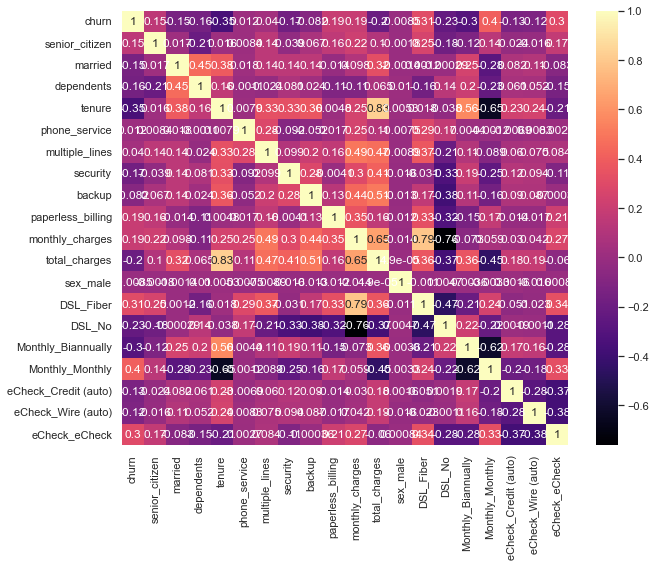

In [21]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df_churn.corr(),annot = True, cmap = 'magma')
#There appears to be no multi-colinearity. The data looks good with tegards to the independence between each variable.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


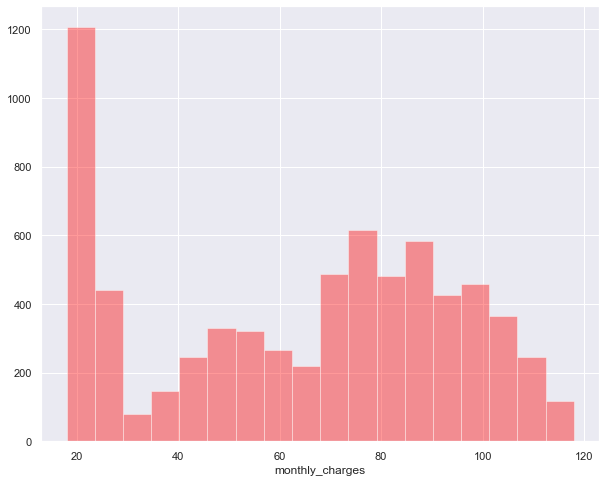

In [22]:
sns.distplot(df_churn['monthly_charges'], kde=False, color = 'red');

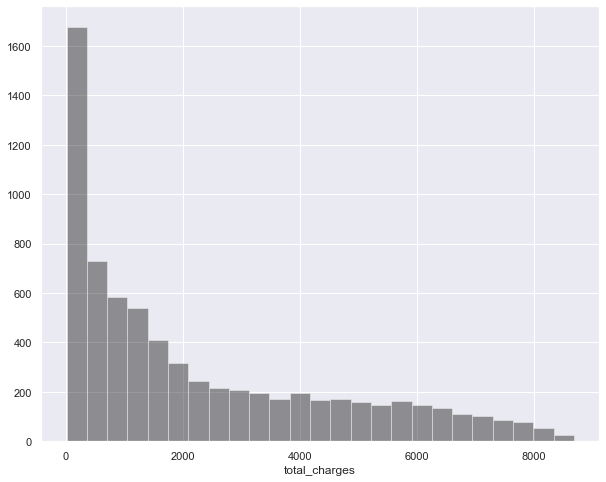

In [23]:
sns.distplot(df_churn['total_charges'], kde=False, color = 'black');

In [24]:
df_churn['churn'].value_counts()

0    5163
1    1869
Name: churn, dtype: int64

In [25]:
#There appears to be a relatively low percentage of people who are churning (26.6%) and purchasing the product. It is clear 
#that the existing marketing strategies are not effective.
df_churn['churn'].value_counts()[1]/(len(df_churn)*1.0)

0.26578498293515357

#### Step #5: Train, Test, and Split the Data to begin running Machine Learning Models on it.

In [26]:
X = df_churn.drop('churn', axis = 1)
y = df_churn['churn']
#Split the data into training and test sets.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Step #6: Start by running a standard linear regression model.

In [37]:
#Train ("fit") the regression model using the training data.
model = LinearRegression()
model.fit(X_train,y_train)
#Identify the intercepts and coefficients of the regression model.
print(model.intercept_)
print(model.coef_)

0.17382664734114622
[ 5.24030137e-02  5.75866961e-03 -1.96264533e-02 -1.81305971e-03
 -8.57991838e-02  3.69274830e-02 -7.51913080e-02 -3.29897146e-02
  4.99019984e-02  2.90974494e-03 -4.83802557e-05 -3.73429685e-03
  1.29099094e-01 -5.89882146e-02  2.28763300e-02  1.08718892e-01
 -8.67034114e-03  1.55537613e-02  7.07335610e-02]


In [38]:
#Use the regression model to predict total bike rentalsin the test data
#Store predictions in a variable called "y_pred".
y_pred = model.predict(X_test)
y_pred

array([-0.03122679,  0.0974723 ,  0.0996002 , ...,  0.19208047,
        0.0612954 ,  0.58425317])

In [39]:
# compare the predicted vs. actual
df_compare = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
df_compare.head(10)

,Actual,predicted
5552,0,-0.031227
5805,0,0.097472
2640,0,0.099600
3976,0,0.186823
6429,0,0.288311
4553,0,0.173129
6262,1,0.442610
4074,1,0.186577
3930,0,0.458020
1352,1,0.602131


In [40]:
#Generate the R squared
metrics.r2_score(y_test, y_pred)
#As illustrated below, a standard linear regression model is not a good fit for this data.

0.27022014248862836

#### Step #7: Now let's try fitting an XGboost model onto the data, to determine whether it is a perferable fit.

In [41]:
from xgboost import XGBClassifier
model = XGBClassifier(maxdepth=8)
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:24] WARNING: ../src/learner.cc:576: 
Parameters: { "maxdepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, maxdepth=8, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
#The XGboost model is a significantly preferable fit.

0.7821387940841866

#### Step #8: Now lets try fitting a CART model onto the data.

In [45]:
np.random.seed(45)
Train, Test = train_test_split(df_churn, test_size = 0.25, random_state = 25)
val, Test2 = train_test_split(Test, test_size = 0.5)
X_Train = Train.drop(columns = ['churn']).values
y_Train = Train['churn'].values
X_val = val.drop(columns = ['churn']).values
y_val = val['churn'].values
X_Test = Test2.drop(columns = ['churn']).values
y_Test = Test2['churn'].values

Let's begin by doing a CART model as follows...

In [46]:
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
  tree = estimator
  names = features
  color = filled
  classn = class_names
  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data,feature_names=features,class_names=classn, filled=filled)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  return(graph)

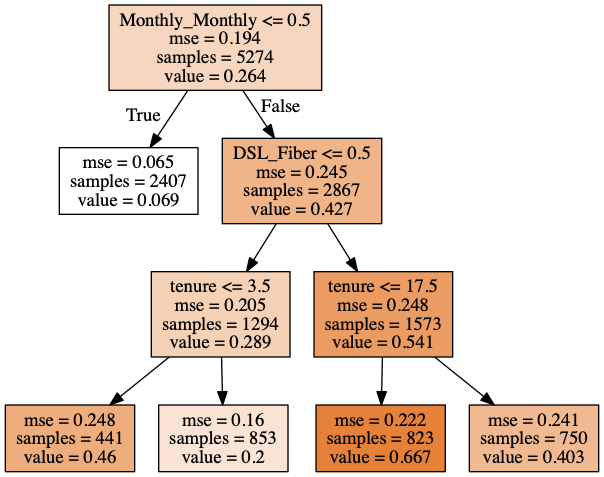

In [48]:
df_tree = DecisionTreeRegressor(min_samples_split=10,min_impurity_decrease=0.002)
df_tree.fit(X_Train, y_Train)
graph, = print_tree(df_tree, features= Train.drop(columns = ['churn']).columns)
Image(graph.create_png())

Create a function that computes the scores for our classification model

In [64]:
def get_metrics(cm, ytrue, ypred):
  sensitivity = round(cm[1,1]/(cm[1,0] + cm[1,1]),3) #sensitivity = true positives / (true positives + false negatives)
  specificity = round(cm[0,0]/(cm[0,0]+cm[0,1]),3) #specificity = true negatives / (true negatives + false positives)
  misclassification = round((cm[0,1] + cm[1,0])/ np.sum(cm),2)
  report = classification_report(ytrue, ypred)
  print(f'Sensitivity rate: {sensitivity}')
  print(f'Specificity rate: {specificity}')
  print(f'Misclassification rate {misclassification}\n')
  print(report)

In [59]:
df_tree_preds = df_tree.predict(X_Test)

In [68]:
tree_cart_pred = confusion_matrix(y_Test, (df_tree_preds > 0.5))
tree_cart_pred

array([[596,  41],
       [137, 105]])

In [61]:
preds_bins = df_tree_preds > 0.5
table = pd.DataFrame({'True':Test2['churn'],'pred':preds_bins}) 
table.groupby(['True','pred']).size().unstack('True')

True,0,1
pred,,
False,596,137
True,41,105


Text(0.5, 48.5, 'Predicted Label')

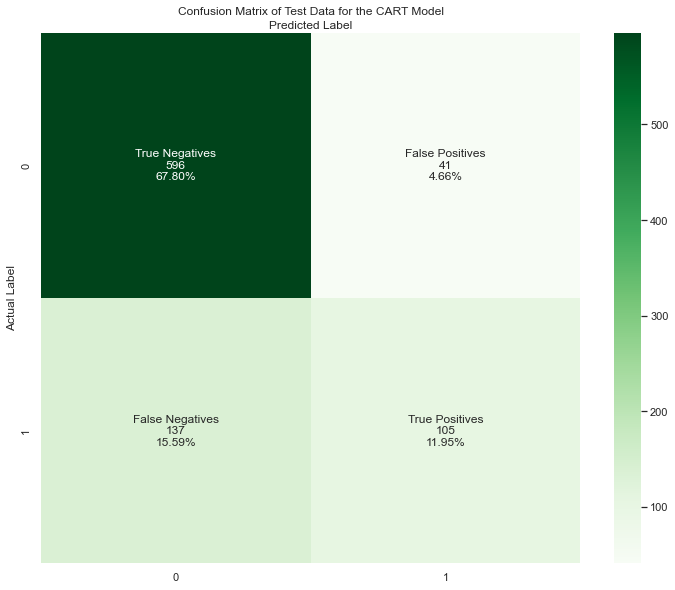

In [69]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in tree_cart_pred.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in tree_cart_pred.flatten()/np.sum(tree_cart_pred)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(tree_cart_pred, annot=labels, fmt='', cmap='Greens')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the CART Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [70]:
get_metrics(tree_cart_pred, ytrue = y_Test, ypred = (df_tree_preds > 0.5))

Sensitivity rate: 0.434
Specificity rate: 0.936
Misclassification rate 0.2

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       637
           1       0.72      0.43      0.54       242

    accuracy                           0.80       879
   macro avg       0.77      0.68      0.71       879
weighted avg       0.79      0.80      0.78       879



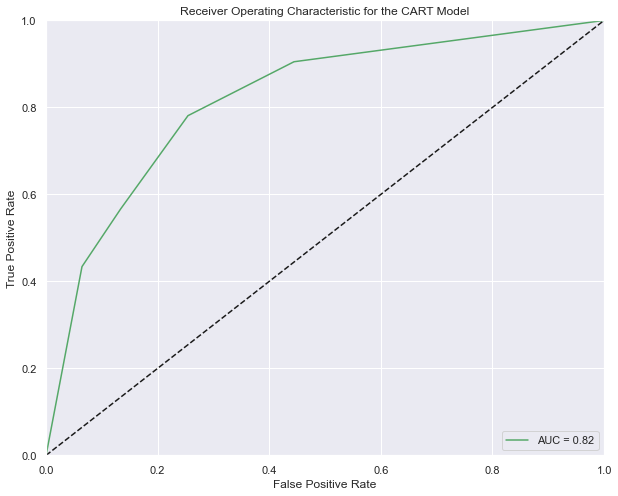

In [71]:
fpr, tpr, threshold = roc_curve(y_Test, df_tree_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for the CART Model')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Step #9: Now lets utilize the power of aggregation to get a more accurate result using a Bagged Random Forest model.

In [97]:
np.random.seed(45)
Train, Test = train_test_split(df_churn, test_size = 0.25, random_state= 25)
val, Test = train_test_split(Test, test_size = 0.5)
X_Train = Train.drop(columns = ['churn']).values
y_Train = Train['churn'].values
X_val = val.drop(columns = ['churn']).values
y_val = val['churn'].values
X_Test = Test.drop(columns = ['churn']).values
y_Test = Test['churn'].values

In [98]:
df_rf = RandomForestRegressor(max_features=6, n_estimators=2000, random_state=1)
df_rf.fit(X_Train, y_Train)

RandomForestRegressor(max_features=6, n_estimators=2000, random_state=1)

In [99]:
df_rf_preds = df_rf.predict(X_Test)
#df_rf_preds

In [100]:
rf_preds = confusion_matrix(y_Test, (df_rf_preds > 0.5))
rf_preds

array([[566,  71],
       [124, 118]])

Text(0.5, 48.5, 'Predicted Label')

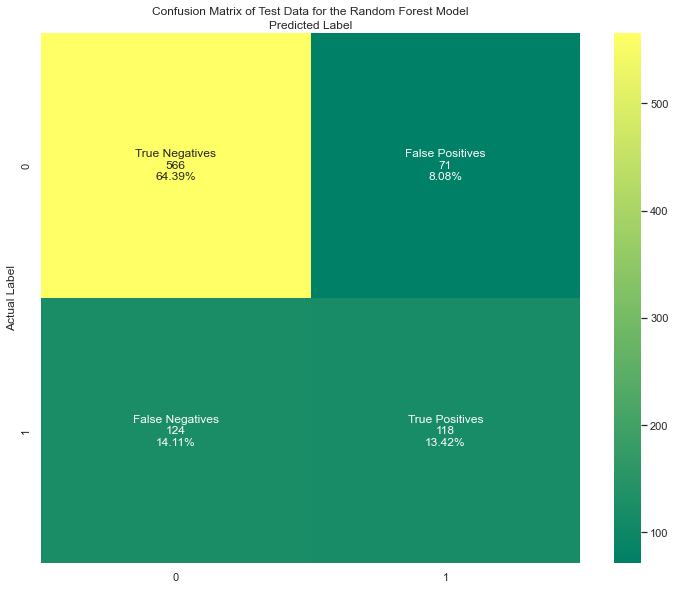

In [101]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in rf_preds.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in rf_preds.flatten()/np.sum(rf_preds)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rf_preds, annot=labels, fmt='', cmap='summer')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the Random Forest Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [102]:
get_metrics(cm = rf_preds, ytrue = y_Test, ypred = (df_rf_preds > 0.5))

Sensitivity rate: 0.488
Specificity rate: 0.889
Misclassification rate 0.22

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       637
           1       0.62      0.49      0.55       242

    accuracy                           0.78       879
   macro avg       0.72      0.69      0.70       879
weighted avg       0.77      0.78      0.77       879



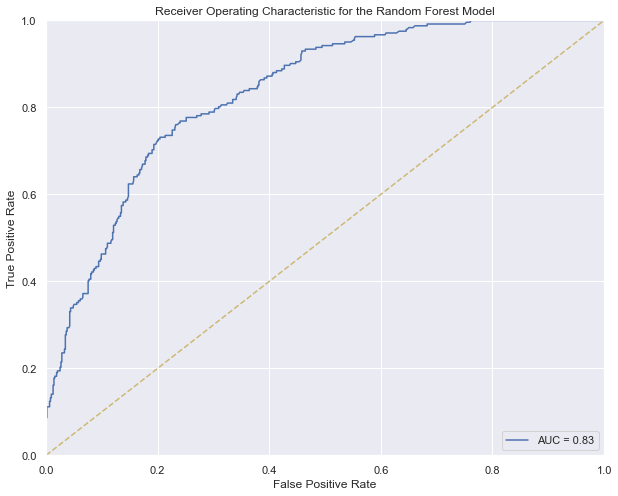

In [104]:
fpr, tpr, threshold = roc_curve(y_Test, df_rf_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for the Random Forest Model')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Step #10: Now lets utilize the power of aggregation to get a more accurate result using a Boosted Random Forest model.

In [140]:
np.random.seed(45)
Train, Test = train_test_split(df_churn, test_size = 0.25, random_state= 25)
val, Test = train_test_split(Test, test_size = 0.5)
X_Train = Train.drop(columns = ['churn']).values
y_Train = Train['churn'].values
X_val = val.drop(columns = ['churn']).values
y_val = val['churn'].values
X_Test = Test.drop(columns = ['churn']).values
y_Test = Test['churn'].values

In [141]:
df_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.001,random_state=1)
df_boost.fit(X_Train, y_Train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=1)

In [142]:
df_boost_preds = df_boost.predict(X_Test)

In [143]:
boost_pred = confusion_matrix(y_Test, (df_boost_preds > 0.5))
boost_pred

array([[580,  57],
       [107, 135]])

Text(0.5, 48.5, 'Predicted Label')

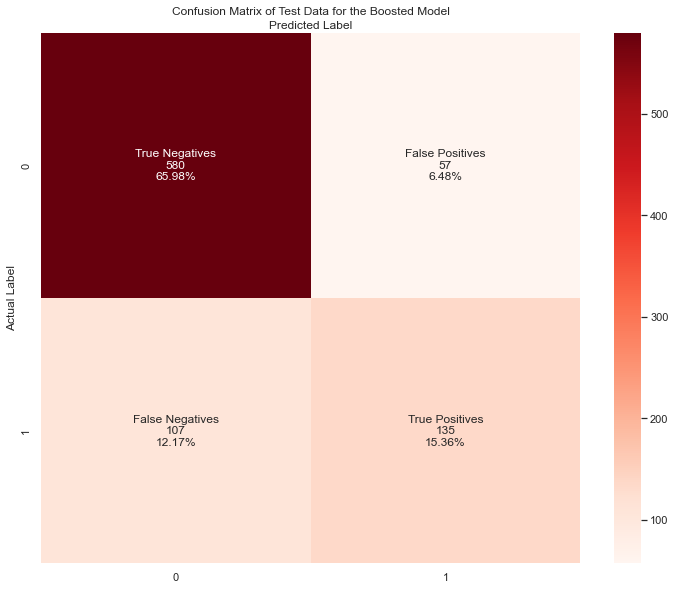

In [144]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in boost_pred.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in boost_pred.flatten()/np.sum(boost_pred)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(boost_pred, annot=labels, fmt='', cmap='Reds')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the Boosted Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [145]:
get_metrics(cm = boost_pred, ytrue = y_Test, ypred = (df_boost_preds > 0.5))

Sensitivity rate: 0.558
Specificity rate: 0.911
Misclassification rate 0.19

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       637
           1       0.70      0.56      0.62       242

    accuracy                           0.81       879
   macro avg       0.77      0.73      0.75       879
weighted avg       0.81      0.81      0.81       879



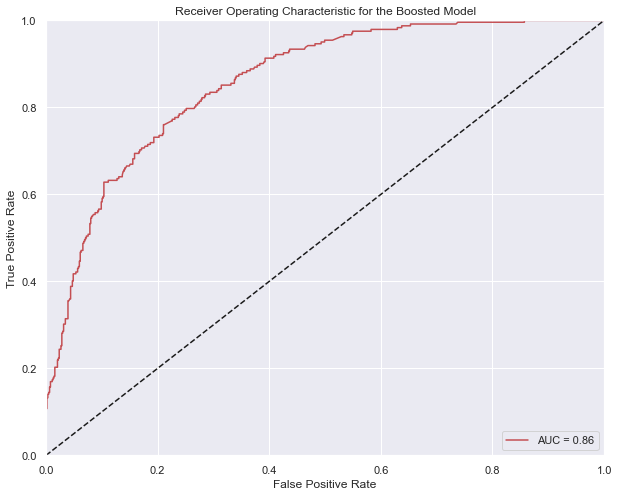

In [146]:
fpr, tpr, threshold = roc_curve(y_Test, df_boost_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for the Boosted Model')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Step #11: Finally, let's run a Neural Network Model.

In [147]:
np.random.seed(45)
Train, Test = train_test_split(df_churn, test_size = 0.25, random_state= 25)
val, Test = train_test_split(Test, test_size = 0.5)
X_Train = Train.drop(columns = ['churn']).values
y_Train = Train['churn'].values
X_val = val.drop(columns = ['churn']).values
y_val = val['churn'].values
X_Test = Test.drop(columns = ['churn']).values
y_Test = Test['churn'].values

In [148]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   churn                 7032 non-null   int64
 1   senior_citizen        7032 non-null   int64
 2   married               7032 non-null   int64
 3   dependents            7032 non-null   int64
 4   tenure                7032 non-null   int64
 5   phone_service         7032 non-null   int64
 6   multiple_lines        7032 non-null   int64
 7   security              7032 non-null   int64
 8   backup                7032 non-null   int64
 9   paperless_billing     7032 non-null   int64
 10  monthly_charges       7032 non-null   int64
 11  total_charges         7032 non-null   int64
 12  sex_male              7032 non-null   int64
 13  DSL_Fiber             7032 non-null   uint8
 14  DSL_No                7032 non-null   uint8
 15  Monthly_Biannually    7032 non-null   uint8
 16  Monthl

In [149]:
X_Train.shape

(5274, 19)

In [150]:
inputs = keras.Input(shape=(19,))
x = layers.Dense(7, activation="relu", name="dense_1")(inputs)
x = layers.Dense(7, activation="relu", name="dense_2")(x)
x = layers.Dense(7, activation="sigmoid", name="dense_3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
df_nnet = keras.Model(inputs=inputs, outputs=outputs)
df_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [151]:
history = df_nnet.fit(
  X_Train,
  y_Train,
  batch_size=45,
  epochs=1000
)

Epoch 1/1000
118/118 [==============================] - 1s 2ms/step - loss: 0.5708 - accuracy: 0.7361
Epoch 2/1000
118/118 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7361
Epoch 3/1000
118/118 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7361
Epoch 4/1000
118/118 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7361
Epoch 5/1000
118/118 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7361
Epoch 6/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7361
Epoch 7/1000
118/118 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7361
Epoch 8/1000
118/118 [==============================] - 1s 5ms/step - loss: 0.5035 - accuracy: 0.7493
Epoch 9/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7732
Epoch 10/1000
118/118 [==============================] - 0s 4ms/step - loss: 0.499

In [152]:
df_nnet_preds = df_nnet.predict(X_Test)

In [153]:
df_nnet_pred = confusion_matrix(y_Test, (df_nnet_preds > 0.5))
df_nnet_pred

array([[590,  47],
       [113, 129]])

Text(0.5, 48.5, 'Predicted Label')

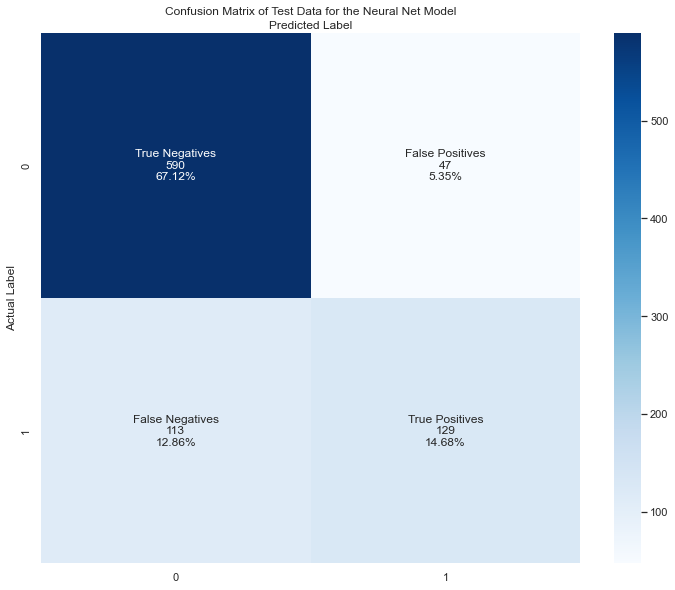

In [154]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in df_nnet_pred.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in df_nnet_pred.flatten()/np.sum(df_nnet_pred)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(df_nnet_pred, annot=labels, fmt='', cmap='Blues')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the Neural Net Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [155]:
get_metrics(cm = df_nnet_pred, ytrue = y_Test, ypred = (df_nnet_preds > 0.5))

Sensitivity rate: 0.533
Specificity rate: 0.926
Misclassification rate 0.18

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       637
           1       0.73      0.53      0.62       242

    accuracy                           0.82       879
   macro avg       0.79      0.73      0.75       879
weighted avg       0.81      0.82      0.81       879



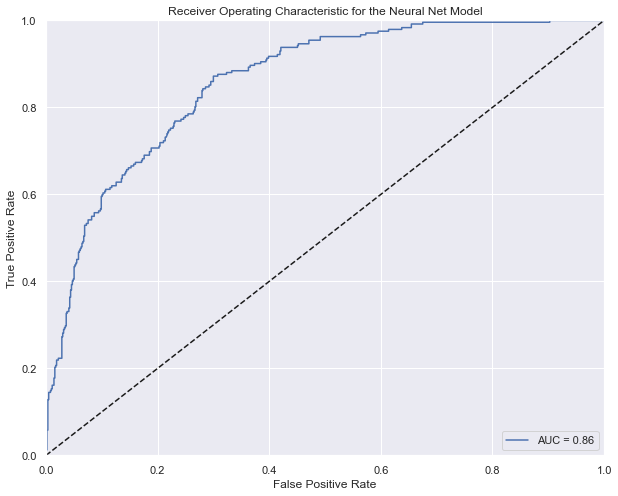

In [156]:
fpr, tpr, threshold = roc_curve(y_Test, df_nnet_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for the Neural Net Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based upon running the various machine learning models, either a Neural Network or a Boosted Random Forest model would be preferable when it comes to predicting for Churn in Ferizon. The most statistically significant variables seems to be tenure and whether a payment is monthly or biannually.